# Linear Regression Abalone Dataset

https://aws.amazon.com/blogs/machine-learning/preprocess-input-data-before-making-predictions-using-amazon-sagemaker-inference-pipelines-and-scikit-learn/



In [48]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
%matplotlib inline


In [49]:
column_names = ['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight', 'rings']
df = pd.read_csv('./dataset/abalone.data', names=column_names)

df.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
sex               4177 non-null object
length            4177 non-null float64
diameter          4177 non-null float64
height            4177 non-null float64
whole_weight      4177 non-null float64
shucked_weight    4177 non-null float64
viscera_weight    4177 non-null float64
shell_weight      4177 non-null float64
rings             4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [51]:
df.describe()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [52]:
# ALL IN ONE CELL

# Read in the data and prepare the features and targets
column_names = ['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight', 'rings']
df = pd.read_csv('./dataset/abalone.data', names=column_names)

numeric_features = list(df.select_dtypes([np.number]).columns)
X = df[numeric_features].copy()
X.drop(columns=['rings'], axis=1, inplace=True)
y = df['rings']

# create a holdout set of 5%
X, X_holdout, y, y_holdout = train_test_split(X,y, test_size=0.05)


# Perform a train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

# Scale the numeric values
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the LinearRegression Model
linreg = LinearRegression()

# fit, score, predict
linreg.fit(X_train_scaled, y_train)
score_scaled = linreg.score(X_test_scaled, y_test)
print("Testing Results")
print(f"R^2 Score: {score_scaled}")
y_pred = linreg.predict(X_test_scaled)

# compute the RMSE of our predictions
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print(f"Test RSME: {rmse}")



Testing Results
R^2 Score: 0.5388363328092406
Test RSME: 2.1527585754690137


In [53]:
# Use Test DataSet
print("Test DataSet")
X_test_scaled = scaler.transform(X_test)
y_pred_test = [round(x, 1) for x in linreg.predict(X_test_scaled)]
test_prediction_df = pd.DataFrame({
        'actual rings': y_test,
        'predicted rings': y_pred_test
    })
test_prediction_df['rings diff'] = test_prediction_df['actual rings'] - test_prediction_df['predicted rings']
test_prediction_df.head()

Test DataSet


,actual rings,predicted rings,rings diff
3830,14,10.8,3.2
3753,8,8.8,-0.8
2112,8,8.8,-0.8
1914,10,9.3,0.7
3097,11,12.6,-1.6


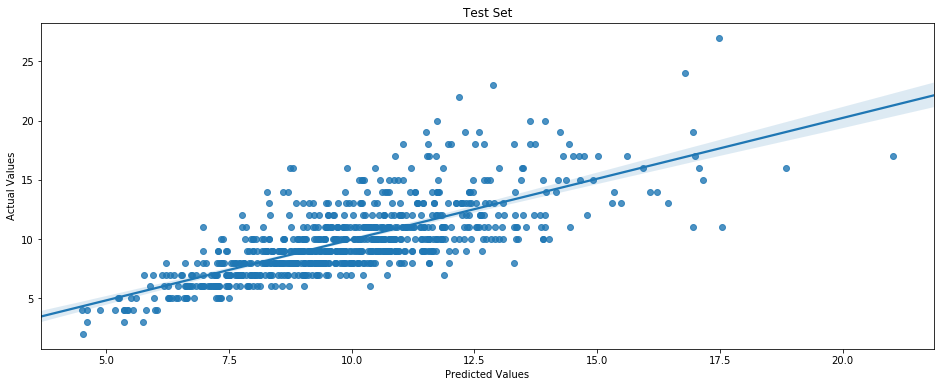

In [64]:
plt.figure(figsize=(16, 6))
plt.title("Test Set")
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
fig = sns.regplot(y_pred,y_test.values)
plt.show(fig)

## Holdout DataSet

In [55]:
rmse = np.sqrt(metrics.mean_squared_error(prediction_df['actual rings'], prediction_df['predicted rings']))
print(f"Holdout RSME: {rmse}")


Holdout RSME: 2.2402259797153024


In [56]:
# Use Holdout DataSet
print("Holdout DataSet")
X_holdout_scaled = scaler.transform(X_holdout)
y_pred_holdout = [round(x, 1) for x in linreg.predict(X_holdout_scaled)]
prediction_df = pd.DataFrame({
        'actual rings': y_holdout,
        'predicted rings': y_pred_holdout
    })
prediction_df['rings diff'] = prediction_df['actual rings'] - prediction_df['predicted rings']
prediction_df.head()



Holdout DataSet


,actual rings,predicted rings,rings diff
1637,8,13.1,-5.1
1104,8,8.6,-0.6
1681,11,12.2,-1.2
1023,10,14.2,-4.2
120,9,9.2,-0.2


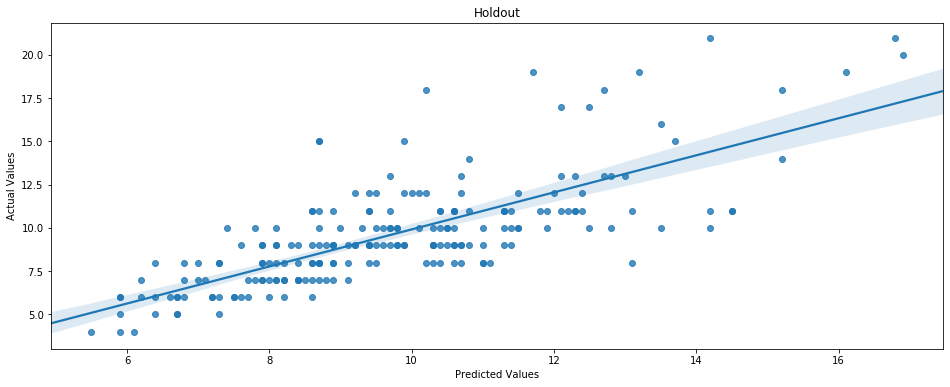

In [66]:
plt.figure(figsize=(16, 6))
plt.title("Holdout")
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")


fig = sns.regplot(prediction_df['predicted rings'].values,prediction_df['actual rings'].values)
plt.show(fig)

In [58]:
linreg = make_pipeline(StandardScaler(), LinearRegression())
scores = cross_val_score(linreg, X, y, cv=3)
print(scores)
print(np.mean(scores))

[0.51824314 0.51846383 0.48182936]
0.5061787781452071


In [59]:
X_holdout.shape

(209, 7)